<a href="https://colab.research.google.com/github/saifullahshaik4/ImageDepthPerception/blob/main/Mini_Project_2_3D_Stereo_in_the_Dark_Saifullah_Shaik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

A stereo 3D vision system uses two cameras to figure out how far away things are by comparing how they look from slightly different angles. The difference is called disparity which helps measure depth closer objects look more shifted between the two images. The farther ones look less shifted. But in low light it’s harder to match details because of noise and blur, making depth estimation less accurate. Regular methods struggle because they rely on clear image details. This is a big challenge for things like self-driving cars that need to see at night, medical tools that work in dark areas, and security cameras that monitor in low light.

#Methods

To develop a stereo matching algorithm for low-light conditions I used the Semi Global Block Matching method. I split it into 3 parts preprocessing, parameter tuning, and evaluation.

In preprocessing I first brightened the images to make features more clear and then used a bilateral filter to reduce noise while keeping important edges sharp. This method was fast while still keeping good image quality.

In parameter tuning I focused on three key settings: block size, denoise strength, and brightness factor. To find the best combination I created a training dataset by darkening and adding noise to high-quality stereo images from the Middlebury 2021 dataset.I added Poisson noise with a noise scale of 100. The final training dataset consisted of 15 stereo image pairs. I focused on three key parameters: block size, denoise strength, and brightness factor and then used a grid search to test 27 different parameter combinations measuring accuracy with RMSE. To speed up this process I tested on a small subset instead of using all images. Since testing all images would be time-consuming, I optimized the parameters using a smaller subset of 5 images. The best combination was found to be block size = 11, denoise strength = 10, and brightness factor = 2.0.

For stereo matching I tried different methods: Block Matching, SGBM, and SGBM with Weighted Least Squares filtering as a post-processing step. While WLS improved results in some cases, SGBM with light Gaussian filtering provided the best balance. I also limited the disparity range to 0-64 pixels to make processing faster without losing much accuracy. I tested Block Matching (BM) an approach that relies on comparing small blocks of pixels between the left and right images. BM did struggles in low-light conditions because noise and low contrast make it difficult to find accurate matches.



#Results
I tested Block Matching (BM) and Semi-Global Block Matching (SGBM) on five low-light stereo image pairs. The results were compared against the ground truth disparity maps using Root Mean Square Error (RMSE). The average RMSE for SGBM was 113.12 and the BM had a higher average RMSE of 129.39. This shows a less accurate disparity estimation. The difference in RMSE between the two methods was 16.27 which confirms that SGBM is better suited for handling noise and low contrast in low-light images.

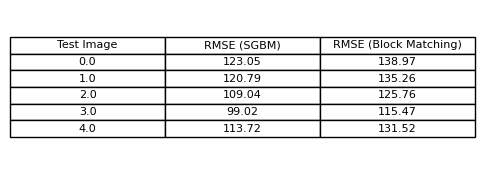

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "Test Image": [0, 1, 2, 3, 4],
    "RMSE (SGBM)": [123.05, 120.79, 109.04, 99.02, 113.72],
    "RMSE (Block Matching)": [138.97, 135.26, 125.76, 115.47, 131.52]
}

df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

plt.show()


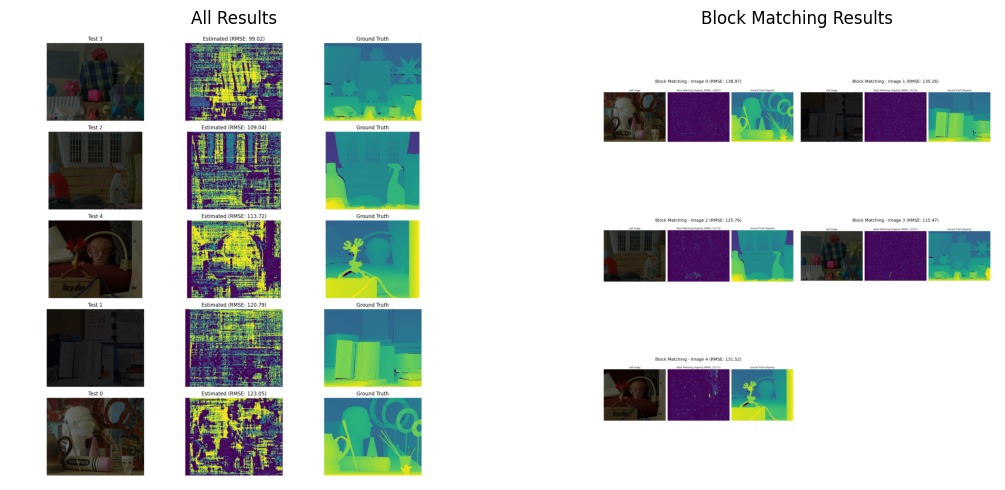

In [ ]:
import cv2
import matplotlib.pyplot as plt

image_paths_1 = [
    "/content/drive/My Drive/Colab Notebooks/proj2 images/all_results.png",
    "/content/drive/My Drive/Colab Notebooks/proj2 images/block_matching_results.png"
]

image_titles_1 = [
    "All Results",
    "Block Matching Results"
]

images_1 = [cv2.cvtColor(cv2.imread(path, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB) for path in image_paths_1]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, img, title in zip(axes, images_1, image_titles_1):
    ax.imshow(img)
    ax.set_title(title)
    ax.axis("off")

plt.tight_layout()
plt.show()



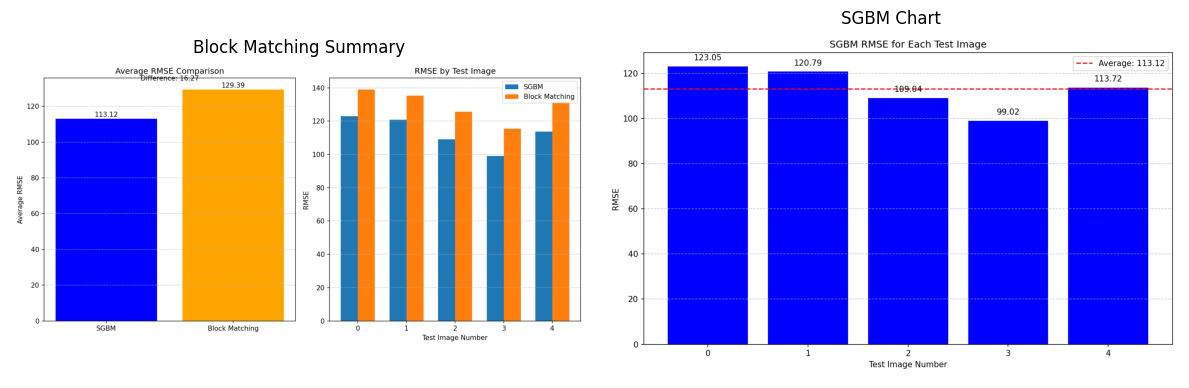

In [ ]:
image_paths_2 = [
    "/content/drive/My Drive/Colab Notebooks/proj2 images/block_matching_summary.png",
    "/content/drive/My Drive/Colab Notebooks/proj2 images/sgbm_chart.png"
]

image_titles_2 = [
    "Block Matching Summary",
    "SGBM Chart"
]

images_2 = [cv2.cvtColor(cv2.imread(path, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB) for path in image_paths_2]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, img, title in zip(axes, images_2, image_titles_2):
    ax.imshow(img)
    ax.set_title(title)
    ax.axis("off")

plt.tight_layout()
plt.show()


#Conclusion

The minimum Root Mean Square Error (RMSE) was 113.1234 across the five test images. One of the biggest challenges I faced was handling low-light conditions because it was difficult to extract clear details from the images. Finding the best parameter settings for the SGBM algorithm was also time-consuming requiring a lot of trial and error. Another challenge was balancing noise reduction too much smoothing blurred important detail and too little left too much noise.

Through this process I realized how important preprocessing is in low-light stereo matching. Adjusting brightness and filtering noise made a big difference in the accuracy of the results. I also learned that small changes in parameter settings had a big impact on performance. Certain parameter combinations that should have worked well didnt perform as expected. I also noticed that the algorithm struggled in extremely dark conditions.

If I had more time I would have tried deep learning based stereo matching, which could improve accuracy by learning patterns from more complex datasets. Testing on a wider variety of images would also help ensure the algorithm works in different environments. Also the algorithm could be useful for real time processing would be useful for practical applications in things like autonomous driving or nighttime surveillance.

#Citations
Hirschmüller, Heiko. "Stereo Processing by Semiglobal Matching and Mutual Information." IEEE Transactions on Pattern Analysis and Machine Intelligence, vol. 30, no. 2, 2008, pp. 328–341.

Jeon, Hae-Gon, et al. "Stereo Matching with Color and Monochrome Cameras in Low-Light Conditions." Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition (CVPR), 2016.

Kendall, Alex, et al. "End-to-End Learning of Geometry and Context for Deep Stereo Regression." Proceedings of the IEEE International Conference on Computer Vision (ICCV), 2017.

Pan, Guanghan, et al. "Middlebury 2021 Stereo Datasets." Middlebury Stereo Vision Page, Middlebury College, 2021.https://vision.middlebury.edu/stereo/data/scenes2021/

Xu, Yuquan, et al. "Real-Time Stereo Vision System at Nighttime with Noise Reduction Using Simplified Non-Local Matching Cost." Proceedings of the IEEE Intelligent Vehicles Symposium (IV), 2016, pp. 998–1003.

Zhang, Yuchao, et al. "Robust Low-Light Stereo Matching via Joint Contrast Enhancement and Cost Regularization." IEEE Transactions on Image Processing, vol. 29, 2020, pp. 5736–5748.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Converting into pdf
!pip install nbconvert >/dev/null
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc >/dev/null

In [ ]:
!jupyter nbconvert --to pdf "/content/drive/MyDrive/Colab Notebooks/Mini Project 2 3D Stereo in the Dark Saifullah Shaik.ipynb" >/dev/null

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Mini Project 2 3D Stereo in the Dark Saifullah Shaik.ipynb to pdf
[NbConvertApp] Support files will be in Mini Project 2 3D Stereo in the Dark Saifullah Shaik_files/
[NbConvertApp] Making directory ./Mini Project 2 3D Stereo in the Dark Saifullah Shaik_files
[NbConvertApp] Writing 34595 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 418656 bytes to /content/drive/MyDrive/Colab Notebooks/Mini Project 2 3D Stereo in the Dark Saifullah Shaik.pdf
